In [7]:
import sys
sys.path.append('../')
import numpy as np
from utils.datasets import YoloDataset
from matplotlib import pyplot as plt
%matplotlib widget

In [8]:
trainset = YoloDataset('../data/train_val.npy', (512, 512))
img, boxs, label = trainset[0]
boxs[:, [0, 2]] *= img.shape[1]
boxs[:, [1, 3]] *= img.shape[0]

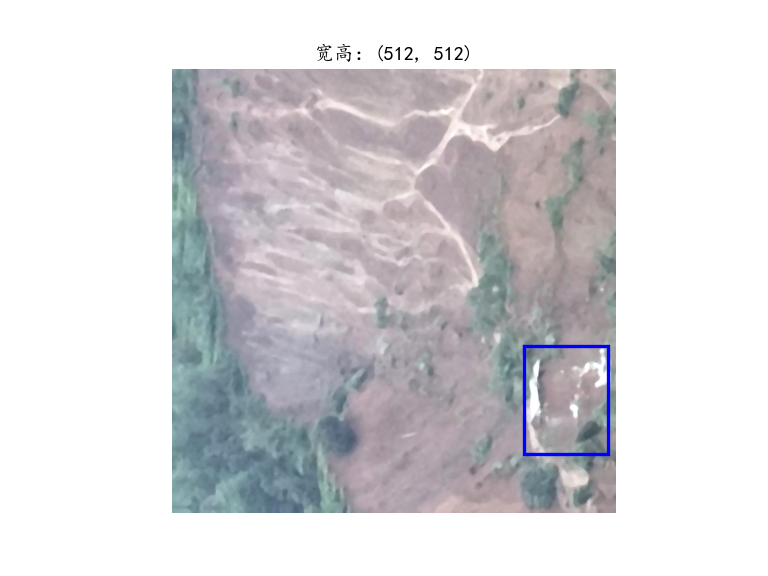

In [9]:
plt.rcParams['font.sans-serif'] = 'SimHei'
plt.rcParams['axes.unicode_minus'] = False
plt.close('绘制矩形框')
plt.figure(num='绘制矩形框', dpi=120)
plt.imshow(img)
for box in boxs:
    rect = plt.Rectangle((box[0]-box[2]/2, box[1]-box[3]/2), box[2], box[3], fill=False, color='blue', lw=2)
    plt.gca().add_patch(rect)
plt.title(f"宽高：{img.shape[:2]}", size=12, family='KaiTi')
plt.gca().set_axis_off()
plt.show()